# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px

In [2]:
balls = pd.read_csv('ball.csv')
balls.shape

(225954, 17)

In [3]:
matches = pd.read_csv('matches.csv')
matches.shape

(950, 20)

In [4]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [5]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [6]:
balls.describe()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
count,2.259540e+05,225954.000000,225954.000000,225954.000000,225954.000000,225954.000000,225954.00000,225954.000000,225954.000000
mean,8.320470e+05,1.483868,9.185679,3.619750,1.243523,0.066907,1.31043,0.000093,0.049351
std,3.379542e+05,0.503104,5.681797,1.810633,1.618166,0.341470,1.60605,0.009640,0.216600
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.012620e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,8.297370e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.00000,0.000000,0.000000
75%,1.178395e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.00000,0.000000,0.000000
max,1.312200e+06,6.000000,19.000000,10.000000,6.000000,7.000000,7.00000,1.000000,1.000000


In [7]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,29-05-2022,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,27-05-2022,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,25-05-2022,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,24-05-2022,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,22-05-2022,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [8]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

# Data Visualization

In [9]:
matches['City'].value_counts().iplot()

# EDA 

## Finding total score of the innings

In [10]:
total_score = balls.groupby(['ID', 'innings']).sum()['total_run'].reset_index()

C:\Users\asdev\AppData\Local\Temp\ipykernel_12228\644940207.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [11]:
total_score.head()

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129


## We only need score of 1st innings
our target is winner prediction so we only need the score of first innings

In [12]:
total_score = total_score[total_score['innings']==1]

In [13]:
total_score.head()

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110


In [14]:
total_score['target'] = total_score['total_run'] + 1

Merge with the mathces dataset

In [15]:
match_df = matches.merge(total_score[['ID','target']], on='ID')

In [16]:
match_df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,target
0,1312200,Ahmedabad,29-05-2022,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,27-05-2022,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,25-05-2022,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,24-05-2022,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,22-05-2022,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158


## Removing old teams / updating teams new names

In [17]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [18]:
teams = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad', 
    'Delhi Capitals', 
    'Chennai Super Kings',
    'Gujarat Titans', 
    'Lucknow Super Giants', 
    'Kolkata Knight Riders',
    'Punjab Kings', 
    'Mumbai Indians'
]

In [19]:
match_df['Team1'] = match_df['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['Team2'] = match_df['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['WinningTeam'] = match_df['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['Team1'] = match_df['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['Team2'] = match_df['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['WinningTeam'] = match_df['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')


match_df['Team1'] = match_df['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['Team2'] = match_df['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['WinningTeam'] = match_df['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [20]:
match_df = match_df[match_df['Team1'].isin(teams)]
match_df = match_df[match_df['Team2'].isin(teams)]
match_df = match_df[match_df['WinningTeam'].isin(teams)]

In [21]:
match_df.shape

(832, 21)

In [22]:
match_df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'target'],
      dtype='object')

In [23]:
fig = px.histogram(match_df, x='WinningTeam')
fig.show()

## We want only the matches where D/L is not applied 
Removing all matches effected due to rain

In [24]:
match_df['method'].unique()

array([nan, 'D/L'], dtype=object)

In [25]:
match_df['method'].value_counts()

D/L    15
Name: method, dtype: int64

In [26]:
match_df = match_df[match_df['method'].isna()]

In [27]:
match_df.shape

(817, 21)

In [28]:
match_df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'target'],
      dtype='object')

In [29]:
match_df = match_df[['ID','City','Team1','Team2','WinningTeam','target']].dropna()

In [30]:
match_df.head()

,ID,City,Team1,Team2,WinningTeam,target
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131
1,1312199,Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,158
2,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore,208
3,1312197,Kolkata,Rajasthan Royals,Gujarat Titans,Gujarat Titans,189
4,1304116,Mumbai,Sunrisers Hyderabad,Punjab Kings,Punjab Kings,158


In [31]:
match_df.isna().sum()

ID             0
City           0
Team1          0
Team2          0
WinningTeam    0
target         0
dtype: int64

Merge the match_df dataset with balls dataset

In [32]:
balls.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [33]:
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

balls = balls[balls['BattingTeam'].isin(teams)]

In [34]:
balls_df = match_df.merge(balls, on='ID')

In [35]:
balls_df.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,1,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,2,YBK Jaiswal,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,3,JC Buttler,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,4,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,5,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [36]:
balls_df['BattingTeam'].value_counts()

Mumbai Indians                 24330
Sunrisers Hyderabad            23201
Kolkata Knight Riders          22929
Royal Challengers Bangalore    22510
Chennai Super Kings            22305
Punjab Kings                   22194
Delhi Capitals                 22040
Rajasthan Royals               20428
Gujarat Titans                  1971
Lucknow Super Giants            1840
Name: BattingTeam, dtype: int64

In [37]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam'],
      dtype='object')

Only select rows where we are in 2nd innings

In [38]:
balls_df = balls_df[balls_df['innings']==2]

In [39]:
balls_df.shape

(89044, 22)

In [40]:
balls_df.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans


In [41]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam'],
      dtype='object')

## Create new row current_score after each ball

In [42]:
balls_df['current_score'] = balls_df.groupby('ID')['total_run'].cumsum()

In [43]:
balls_df

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183743,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,14,5,P Kumar,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80
183744,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,14,6,SB Joshi,...,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81
183745,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,14,7,P Kumar,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81
183746,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,15,1,SB Joshi,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82


In [44]:
balls_df['runs_left'] = np.where(balls_df['target']-balls_df['current_score']>=0, balls_df['target']-balls_df['current_score'], 0)

In [45]:
balls_df

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183743,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,14,5,P Kumar,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80,143
183744,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,14,6,SB Joshi,...,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142
183745,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,14,7,P Kumar,...,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142
183746,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,15,1,SB Joshi,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82,141


In [46]:
balls_df['balls_left'] = np.where(120 - balls_df['overs']*6 - balls_df['ballnumber']>=0,120 - balls_df['overs']*6 - balls_df['ballnumber'], 0)

In [47]:
balls_df['wickets_left'] = 10 - balls_df.groupby('ID')['isWicketDelivery'].cumsum()

In [48]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'current_score', 'runs_left', 'balls_left',
       'wickets_left'],
      dtype='object')

In [49]:
balls_df['current_run_rate'] = (balls_df['current_score']*6)/(120-balls_df['balls_left'])

In [50]:
balls_df['required_run_rate'] = np.where(balls_df['balls_left']>0, balls_df['runs_left']*6/balls_df['balls_left'], 0)

In [51]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'current_score', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate'],
      dtype='object')

In [52]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [53]:
balls_df['result'] = balls_df.apply(result, axis=1)

In [54]:
balls_df.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,NaN,NaN,Gujarat Titans,0,131,119,10,0.0,6.605042,1
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,NaN,NaN,Gujarat Titans,0,131,118,10,0.0,6.661017,1
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,NaN,NaN,Gujarat Titans,1,130,117,10,2.0,6.666667,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,NaN,NaN,Gujarat Titans,1,130,116,10,1.5,6.724138,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,NaN,NaN,Gujarat Titans,1,130,115,10,1.2,6.782609,1


In [55]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'current_score', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'result'],
      dtype='object')

In [56]:
index1 = balls_df[balls_df['Team2']==balls_df['BattingTeam']]['Team1'].index
index2 = balls_df[balls_df['Team1']==balls_df['BattingTeam']]['Team2'].index

In [57]:
balls_df.loc[index1, 'BowlingTeam'] = balls_df.loc[index1, 'Team1']
balls_df.loc[index2, 'BowlingTeam'] = balls_df.loc[index2, 'Team2']

In [58]:
balls_df.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result,BowlingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,NaN,Gujarat Titans,0,131,119,10,0.0,6.605042,1,Rajasthan Royals
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,NaN,Gujarat Titans,0,131,118,10,0.0,6.661017,1,Rajasthan Royals
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,NaN,Gujarat Titans,1,130,117,10,2.0,6.666667,1,Rajasthan Royals
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,NaN,Gujarat Titans,1,130,116,10,1.5,6.724138,1,Rajasthan Royals
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,NaN,Gujarat Titans,1,130,115,10,1.2,6.782609,1,Rajasthan Royals


In [59]:
final_df = balls_df[['BattingTeam', 'BowlingTeam','City','runs_left','balls_left','wickets_left','current_run_rate','required_run_rate','target','result']]

In [60]:
final_df.head()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,119,10,0.0,6.605042,131,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,118,10,0.0,6.661017,131,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,117,10,2.0,6.666667,131,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,116,10,1.5,6.724138,131,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,115,10,1.2,6.782609,131,1


In [61]:
fig = px.bar(final_df['City'].value_counts())
fig.show()

In [62]:
fig = px.bar(final_df['BattingTeam'].value_counts())
fig.show()

In [63]:
fig = px.bar(final_df['BowlingTeam'].value_counts())
fig.show()

In [64]:
fig = px.histogram(final_df[final_df['runs_left']>0]['runs_left'], nbins=30,)
fig.show()

In [65]:
fig = px.bar(final_df['wickets_left'].value_counts())
fig.show()

In [66]:
fig = px.histogram(final_df['target'], nbins=30)
fig.show()

In [67]:
final_df.describe()

,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
count,89044.000000,89044.000000,89044.000000,89044.000000,89044.000000,89044.000000,89044.000000
mean,92.743419,62.560251,7.535600,7.421803,10.586524,166.071628,0.526616
std,49.758982,33.416718,2.149637,2.237734,12.932122,28.738283,0.499294
min,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000
25%,53.000000,34.000000,6.000000,6.276923,7.210526,148.000000,0.000000
50%,92.000000,63.000000,8.000000,7.485149,8.910891,166.000000,1.000000
75%,130.000000,91.000000,9.000000,8.653846,10.961538,186.000000,1.000000
max,247.000000,119.000000,10.000000,36.000000,714.000000,247.000000,1.000000


In [68]:
final_df.isna().sum()

BattingTeam          0
BowlingTeam          0
City                 0
runs_left            0
balls_left           0
wickets_left         0
current_run_rate     0
required_run_rate    0
target               0
result               0
dtype: int64

In [69]:
final_df.shape

(89044, 10)

In [70]:
final_df.sample(final_df.shape[0])

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
138363,Delhi Capitals,Kolkata Knight Riders,Delhi,83,48,7,5.500000,10.375000,149,0
44269,Rajasthan Royals,Punjab Kings,Chandigarh,155,101,10,8.842105,9.207921,183,0
37056,Kolkata Knight Riders,Sunrisers Hyderabad,Abu Dhabi,100,92,8,9.214286,6.521739,143,1
128192,Royal Challengers Bangalore,Punjab Kings,Chandigarh,12,14,7,8.603774,5.142857,164,1
23867,Sunrisers Hyderabad,Punjab Kings,Sharjah,66,43,6,4.675325,9.209302,126,0
...,...,...,...,...,...,...,...,...,...,...
4753,Delhi Capitals,Chennai Super Kings,Navi Mumbai,126,58,4,8.032258,13.034483,209,0
94140,Punjab Kings,Kolkata Knight Riders,Kolkata,77,40,5,6.525000,11.550000,164,0
33681,Mumbai Indians,Royal Challengers Bangalore,Abu Dhabi,152,109,10,7.090909,8.366972,165,1
145507,Delhi Capitals,Chennai Super Kings,Chennai,89,93,7,5.333333,5.741935,113,1


Randomly shuffle all the rows

In [71]:
final_df.sample()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
2363,Mumbai Indians,Sunrisers Hyderabad,Mumbai,108,63,10,9.052632,10.285714,194,0


## One hot encoding

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False,drop='first'),['BattingTeam','BowlingTeam','City'])
],
remainder = 'passthrough')


In [73]:
from sklearn.model_selection import train_test_split

X = final_df.drop('result', axis=1)
y = final_df['result']
X.shape, y.shape

((89044, 9), (89044,))

In [74]:
X.head()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,119,10,0.0,6.605042,131
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,118,10,0.0,6.661017,131
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,117,10,2.0,6.666667,131
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,116,10,1.5,6.724138,131
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,115,10,1.2,6.782609,131


In [75]:
y.head()

120    1
121    1
122    1
123    1
124    1
Name: result, dtype: int64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [78]:
logistic = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver="liblinear"))
    
])

In [79]:
logistic.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [80]:
y_pred1 = logistic.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1, y_test)

0.8024691358024691

In [82]:
from sklearn import metrics
confusion_matrix1 = metrics.confusion_matrix(y_test, y_pred1)

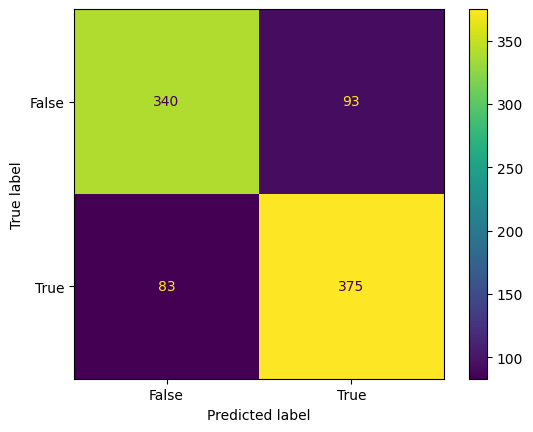

In [83]:
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display1.plot()
plt.show()

In [84]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [85]:
precision_score(y_pred1, y_test)

0.8187772925764192

In [86]:
recall_score(y_pred1, y_test)

0.8012820512820513

In [87]:
f1_score(y_pred1, y_test)

0.8099352051835853

In [88]:
randomforest = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [89]:
randomforest.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('step2', RandomForestClassifier())])

In [90]:
y_pred = randomforest.predict(X_test)

In [91]:
accuracy_score(y_pred, y_test)

0.9955106621773289

In [92]:
precision_score(y_pred, y_test)

0.9978165938864629

In [93]:
recall_score(y_pred, y_test)

0.9934782608695653

In [94]:
f1_score(y_pred, y_test)

0.9956427015250545

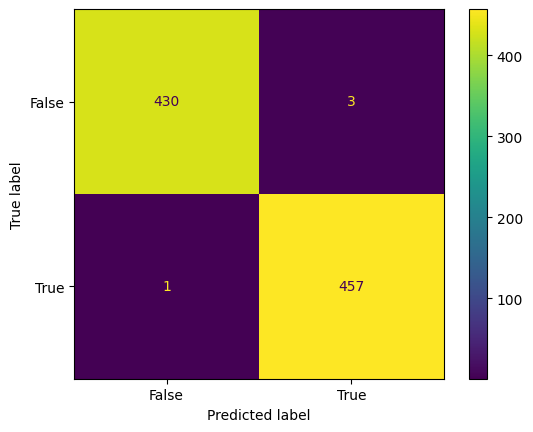

In [95]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [96]:
randomforest.predict_proba(X_test)

array([[0.  , 1.  ],
       [0.02, 0.98],
       [0.99, 0.01],
       ...,
       [0.92, 0.08],
       [0.98, 0.02],
       [1.  , 0.  ]])

In [97]:
z= pd.DataFrame({"BattingTeam":["Gujarat Titans"],"BowlingTeam":['Rajasthan Royals'],"City":['Ahmedabad'],"runs_left":[113],"balls_left":[119],"wickets_left":[10],"current_run_rate":[0.0],"required_run_rate":[6.605042],"target":[131]})
z.head()  
print(randomforest.predict(z))

[1]


In [98]:
w= pd.DataFrame({"BattingTeam":["Rajasthan Royals"],"BowlingTeam":['Delhi Capitals'],"City":['Abu Dhabi'],"runs_left":[45],"balls_left":[4],"wickets_left":[4],"current_run_rate":[5.689655],"required_run_rate":[67.5],"target":[155]}) 
pred=print(randomforest.predict(w))
pred

[0]


In [99]:
from sklearn.naive_bayes import GaussianNB
naivebayers = Pipeline(steps=[
    ('step1',trf),
    ('step2',GaussianNB())
    
])


In [100]:
naivebayers.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('step2', GaussianNB())])

In [101]:
y_pred2 = naivebayers.predict(X_test)

In [102]:
accuracy_score(y_pred2, y_test)

0.7171717171717171

In [103]:
precision_score(y_pred2, y_test)

0.7816593886462883

In [104]:
recall_score(y_pred2, y_test)

0.7019607843137254

In [105]:
f1_score(y_pred2, y_test)

0.7396694214876034

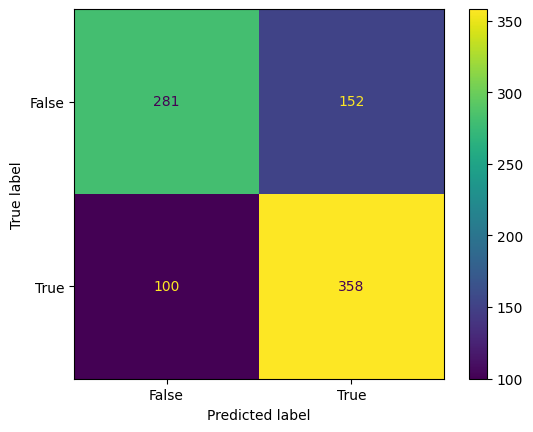

In [106]:
confusion_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display2.plot()
plt.show()